In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
booking = pd.read_csv('data_abalone.csv')
df = booking[["Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings","Sex"]]

In [3]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [4]:
#Dataset info
df.shape

(4177, 9)

In [5]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.052909
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.822240
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


In [6]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [7]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [8]:
outliers_IF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF
31,0.680,0.560,0.165,1.6390,0.6055,0.2805,0.4600,15,0,-1
33,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.4550,19,0,-1
34,0.705,0.550,0.200,1.7095,0.6330,0.4115,0.4900,13,0,-1
42,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5,1,-1
43,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5,1,-1
...,...,...,...,...,...,...,...,...,...,...
4106,0.720,0.590,0.205,1.7495,0.7755,0.4225,0.4800,11,0,-1
4112,0.560,0.420,0.180,1.6645,0.7755,0.3500,0.4525,9,0,-1
4145,0.670,0.525,0.200,1.7405,0.6205,0.2970,0.6570,11,2,-1
4148,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11,2,-1


In [9]:
inliers_IF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,1
...,...,...,...,...,...,...,...,...,...,...
4171,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,2,1
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2,1


In [10]:
def is_inlier(row):
    # Viscera weight constraint: Viscera weight must not exceed Whole weight
    if row['Viscera weight'] > row['Whole weight']:
        return -1
        
    # Length Constraint: 0.05 < Length < 1
    if row['Length'] < 0.05 or row['Length'] > 1:
        return -1

    # Diameter Constraint: 0.05 < Diameter < 1
    if row['Diameter'] < 0.05 or row['Diameter'] > 1:
        return -1

    # Height Constraint: 0 < Height < 1.5
    if row['Height'] < 0 or row['Height'] > 1.5:
        return -1

    # Whole weight Constraint: 0 < Whole weight < 3
    if row['Whole weight'] < 0 or row['Whole weight'] > 3:
        return -1

    # Shucked weight Constraint: 0 < Shucked weight < 1.6
    if row['Shucked weight'] < 0 or row['Shucked weight'] > 1.6:
        return -1

    # Viscera weight Constraint: 0 < Viscera weight < 1
    if row['Viscera weight'] < 0 or row['Viscera weight'] > 1:
        return -1

    # Shell weight Constraint: 0 < Shell weight < 1.5
    if row['Shell weight'] < 0 or row['Shell weight'] > 1.5:
        return -1

    # Measurement constraint: Measurements must be non-negative
    if row['Length'] < 0 or row['Diameter'] < 0 or row['Height'] < 0:
        return -1

    # Weightconstraint: Weights must be non-negative
    if row['Whole weight'] < 0 or row['Shucked weight'] < 0 or row['Viscera weight'] < 0 or row['Shell weight'] < 0:
        return -1

    #Ring constraint: Rings must be non-negative
    if row['Rings'] < 0:
        return -1

    # Density constraint: Density (Whole weight / Volume) should be realistic
    volume = row['Length'] * row['Diameter'] * row['Height']
    if volume > 0 and row['Whole weight'] / volume < 1:
        return -1
        
    # If all constraints are satisfied, return True
    return 1

In [11]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [12]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex,is_inlier_IF,is_inlier_HW


In [13]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [14]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [15]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [16]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[   0,    0],
       [ 418, 3759]])

Text(95.72222222222221, 0.5, 'Handwritten')

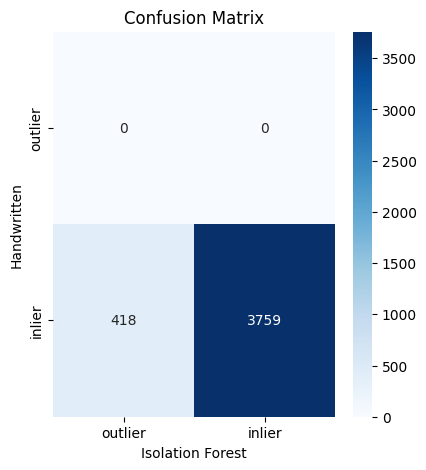

In [17]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [18]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [19]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")